In [1]:
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import PIL
from keras.models import load_model
import cv2
import numpy as np 

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [4]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
#model.summary()

In [6]:
batch_size = 10 

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data 
train_generator = train_datagen.flow_from_directory(
        'Face Mask Dataset\Train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size)
        #class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'Face Mask Dataset\Test',
        target_size=(150, 150),
        batch_size=batch_size),
        #class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [7]:
model.fit(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model.save('face-mask.h5')  # always save your weights after training or during training

Epoch 1/20
200/200 [==============================] - 15s 67ms/step - loss: 0.3708 - accuracy: 0.8590 - val_loss: 0.2596 - val_accuracy: 0.9162
Epoch 2/20
200/200 [==============================] - 13s 64ms/step - loss: 0.3096 - accuracy: 0.8855 - val_loss: 0.2185 - val_accuracy: 0.9112
Epoch 3/20
200/200 [==============================] - 12s 61ms/step - loss: 0.3078 - accuracy: 0.8995 - val_loss: 0.1710 - val_accuracy: 0.9400
Epoch 4/20
200/200 [==============================] - 12s 60ms/step - loss: 0.2531 - accuracy: 0.9105 - val_loss: 0.1747 - val_accuracy: 0.9388
Epoch 5/20
200/200 [==============================] - 12s 60ms/step - loss: 0.2679 - accuracy: 0.8990 - val_loss: 0.1228 - val_accuracy: 0.9563
Epoch 6/20
200/200 [==============================] - 12s 60ms/step - loss: 0.2378 - accuracy: 0.9205 - val_loss: 0.1564 - val_accuracy: 0.9513
Epoch 7/20
200/200 [==============================] - 12s 59ms/step - loss: 0.2329 - accuracy: 0.9175 - val_loss: 0.1296 - val_accuracy:

In [8]:
model = load_model('face-mask.h5') #9885, 9912 l 0458, 0482   my_model_mask.h5

In [9]:
image_path = r'C:\Users\sonuc\Desktop\Data_Science\facemask_detection\testing_live\1.jpg'

In [10]:
user_img = image.load_img(image_path,target_size = (150,150))
user_img = image.img_to_array(user_img)
user_img = user_img.reshape(1, 150, 150, 3)


x = (model.predict(user_img) > 0.5).astype("int32")
#print(x)
if(x[0][0]== 0):      
    label = 'You are wearing mask'
    print(label)
else:
    label = 'You are not wearing mask'
    print(label)

You are not wearing mask


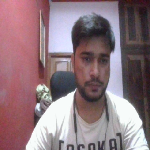

In [11]:
kuser_img = image.load_img(image_path,target_size = (150,150))
kuser_img

In [12]:
model = load_model('face-mask.h5')


results={0:'Without Mask',1:'Mask'}
GR_dict={0:(0,0,255),1:(0,255,0)}
rect_size = 4
cap = cv2.VideoCapture(0) 
haarcascade = cv2.CascadeClassifier('C:/Users/sonuc\Desktop/Data_Science/facemask_detection/haarcascade_frontalface_default.xml')
while True:
    (rval, im) = cap.read() #rval give us true or flase and im give us image data
    im=cv2.flip(im,1,1) 
    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    
    if key == 27: 
        break
cap.release()
cv2.destroyAllWindows()

In [12]:
#face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [4]:
im.shape[1]

640

In [5]:
im.shape[0]

480